# Statistics basics

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shop can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

First, let us load these datasets and make a quick glance on them.

### Step 1 
Load datasets intro variables `customers`, `purchases` and `shops`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
customers = pd.read_csv('https://github.com/mbburova/MDS/raw/main/customers.csv', sep = ',')
purchases = pd.read_csv('https://github.com/mbburova/MDS/raw/main/purchases.csv', sep = ',')
shops = pd.read_csv('https://github.com/mbburova/MDS/raw/main/shops.csv')

In [3]:
purchases.head(5)

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038


In [4]:
customers.head(5)

,customer id,age
0,1149,71.0
1,750,21.0
2,428,36.0
3,360,38.0
4,816,51.0


In [5]:
shops.head(5)

,shop_id,offer_begin,offer_end
0,0,2019-02-28,2019-03-13
1,0,2018-07-22,2018-08-10
2,0,2018-09-21,2018-09-27
3,1,NaN,NaN
4,2,NaN,NaN


### Step 2

Let's consider the column `total_price` in the dataset `purchases`. Each value in the column depends on the customer, the date and the specific shop. 
- Each customer has their own preferences and income - one buys an average of 2,000, the other 500. 
- The cost of products depends on the date over time, for example, in winter the price of bananas was 100, and in summer 50, but let's say a particular buyer has a need for 1 kg of bananas, in winter he will pay 100 for it, and in summer 50.
- The price also depends on the specific store, as different stores may have different prices for the same product. Stores can also be segmented depending on the type of customers - one for the middle class, the other for the rich, etc.

The above facts indicate that we can't assume that column `total_price` in the dataset `purchases` is an independent and identically distributed sample from some random variable.

### Step 3
Let's visualise distribution of variable `age` in the dataset `customers`.


(array([ 72., 119., 100., 117.,  92., 115.,  91.,  62.,  43.,  13.]),
 array([12. , 19.6, 27.2, 34.8, 42.4, 50. , 57.6, 65.2, 72.8, 80.4, 88. ]),
 <BarContainer object of 10 artists>)

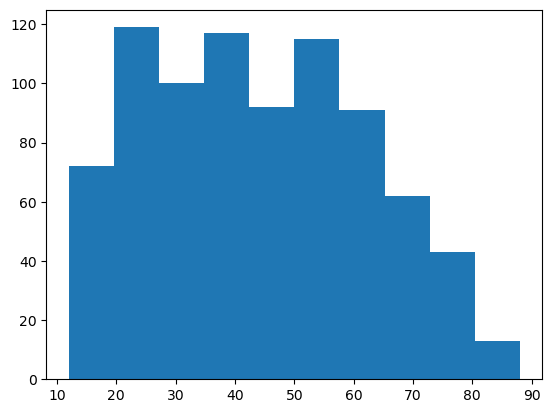

In [6]:
plt.hist(x=customers['age'])

### Step 4
Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [7]:
answer = customers['age'].median()
print(f'answer is {answer}')
print(f"difference between age < 43 and age >= 43: {abs(len(customers[customers['age'] < 43.0]) - len(customers[customers['age'] >= 43.0]))}")

answer is 43.0
difference between age < 43 and age >= 43: 8


### Step 5

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas.

To do it, we have to extract a month from the `date` variable of `purchases` table and create a new variable (new dataframe column) that contains this month, then plot distribution of this variable.


In [8]:
purchases["date"] = pd.to_datetime(purchases["date"])

Now let us return to our problem here. We want to make a plot that shows how many purchases we have per month. In other words, we want to create and consider new variable `month`. This is a categorical variable.


In [11]:
purchases['month'] = purchases['date'].dt.month
purchases.head(5)

,customer_id,date,shop_id,total_price,month
0,0.0,2018-05-04,40,289.673291,5
1,0.0,2019-01-26,40,1316.898901,1
2,0.0,2018-11-18,42,159.414367,11
3,0.0,2018-05-12,42,808.791649,5
4,0.0,2019-04-20,42,1207.855038,4


Text(0, 0.5, 'Number of purchases')

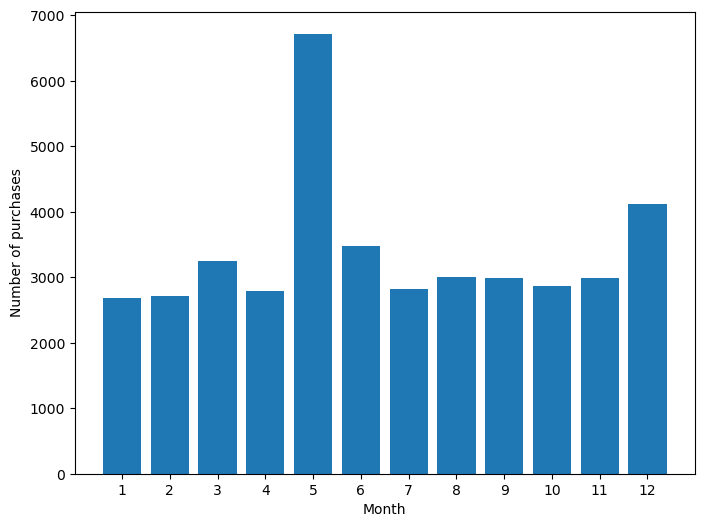

In [12]:
plt.figure(figsize=(8, 6))
x = range(1, 13)
y = purchases['month'].value_counts().sort_index()
plt.bar(x, y)
plt.xticks(x)
plt.xlabel("Month")
plt.ylabel("Number of purchases")

### Step 6

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Let's investigate the data.

Let's look at the distribution of purchases in May depending on the day of the month:

C:\Users\y2966\AppData\Local\Temp\ipykernel_10888\4236694067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_in_may['day'] = purchases_in_may['date'].dt.day


Text(0, 0.5, 'Number of purchases')

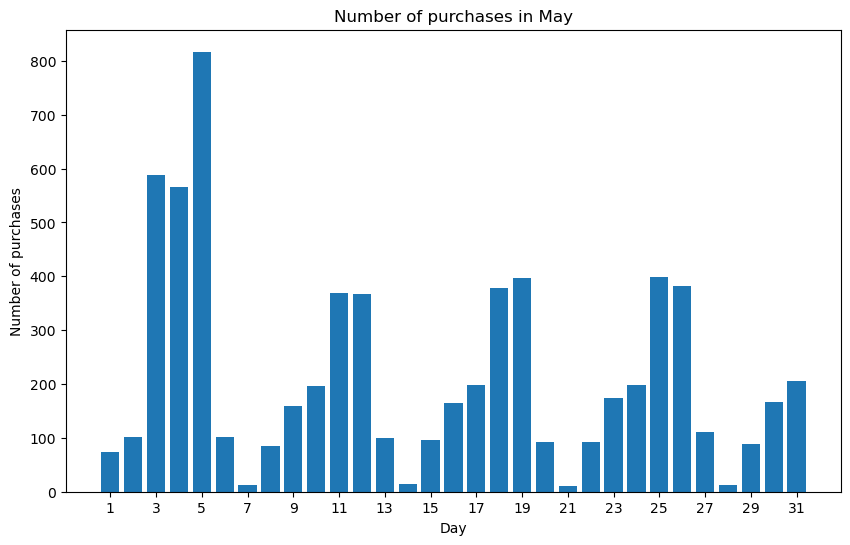

In [13]:
purchases_in_may = purchases[purchases['month'] == 5]
purchases_in_may['day'] = purchases_in_may['date'].dt.day

plt.figure(figsize=(10, 6))
x_may = range(1, 32)
y_may = purchases_in_may['day'].value_counts().sort_index()

plt.xticks(range(1, 32, 2))
plt.bar(x_may, y_may)
plt.title("Number of purchases in May")
plt.xlabel("Day")
plt.ylabel("Number of purchases")

Let's look at the distribution of purchases in other months depending on the day of the month:

C:\Users\y2966\AppData\Local\Temp\ipykernel_10888\3241165970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_in_april['day'] = purchases_in_april['date'].dt.day


Text(0, 0.5, 'Number of purchases')

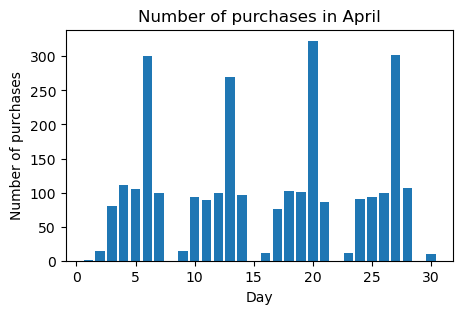

In [14]:
purchases_in_april = purchases[purchases['month'] == 4]
purchases_in_april['day'] = purchases_in_april['date'].dt.day

plt.figure(figsize=(5, 3))
x_april = sorted(set(purchases_in_april['day'].values))
y_april = purchases_in_april['day'].value_counts().sort_index()
plt.bar(x_april, y_april)
plt.title("Number of purchases in April")
plt.xlabel("Day")
plt.ylabel("Number of purchases")

C:\Users\y2966\AppData\Local\Temp\ipykernel_10888\1252736818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases_in_august['day'] = purchases_in_august['date'].dt.day


Text(0, 0.5, 'Number of purchases')

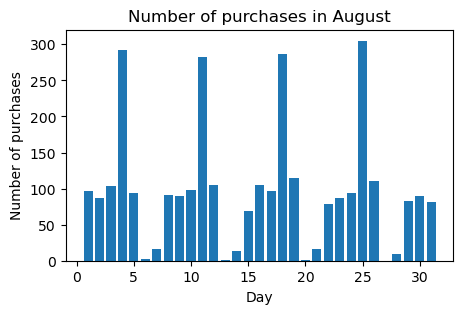

In [15]:
purchases_in_august = purchases[purchases['month'] == 8]
purchases_in_august['day'] = purchases_in_august['date'].dt.day

plt.figure(figsize=(5, 3))
x_august = sorted(set(purchases_in_august['day'].values))
y_august = purchases_in_august['day'].value_counts().sort_index()
plt.bar(x_august, y_august)
plt.title("Number of purchases in August")
plt.xlabel("Day")
plt.ylabel("Number of purchases")

We see that there is a certain pattern of shopping behavior in each month, but there are many more purchases in early May. This may be due to long weekends, but other weeks are significantly different from other months.

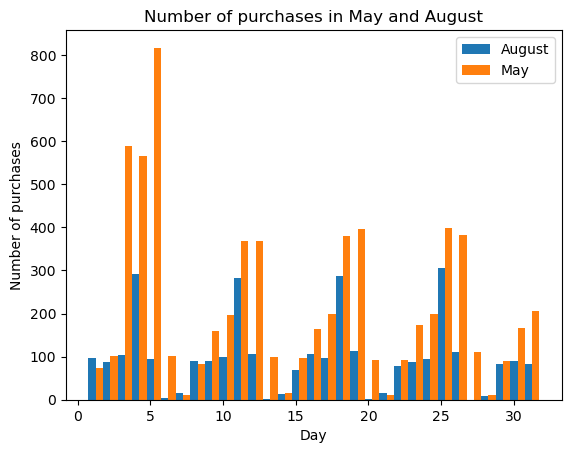

In [16]:
import numpy as np

X = np.array(x_may)
plt.bar(x_august, y_august, width=0.5, label='August')
plt.bar(X + 0.5, y_may, width=0.5, label='May')

plt.title("Number of purchases in May and August")
plt.xlabel("Day")
plt.ylabel("Number of purchases")
plt.legend()

We may see that the number of purchases in May significantly exceeds purhases in other months, even outside the holidays.

Let's check the number of purchases in each months in 2018 and 2019:

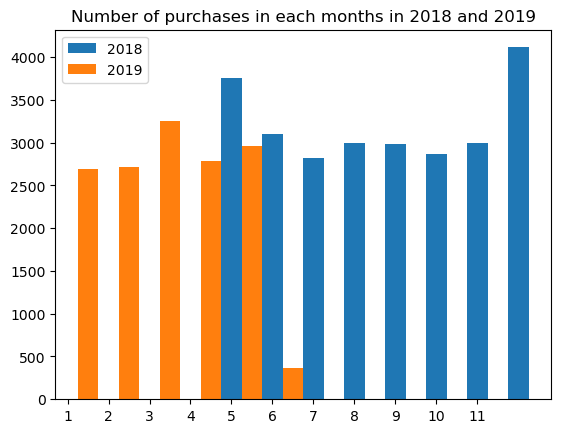

In [17]:
purchases['year'] = purchases['date'].dt.year
purchases['month'] = purchases['date'].dt.month
Y_2018 = purchases.loc[purchases['year'] == 2018]['month'].value_counts().sort_index()
X_2018 = np.array(Y_2018.index.to_list())
Y_2019 = purchases.loc[purchases['year'] == 2019]['month'].value_counts().sort_index()
X_2019 = np.array(Y_2019.index.to_list())
months = sorted(set(Y_2018.index.to_list() + Y_2019.index.to_list()))
X = np.array(months)

plt.bar(X_2018, Y_2018, width=0.5, label='2018')
plt.bar(X_2019 + 0.5, Y_2019, width=-0.5, label='2019')
plt.xticks(range(1, 12))
plt.title('Number of purchases in each months in 2018 and 2019')
plt.legend()


We observe that the number of offers in May is higher than in other months. This is due to the fact that our data includes information about purchases from May 2018 to the beginning of June 2019, so we have purchases data for May 2018 and May 2019, which explains such a large number of sales in May. In June, sales also overlap, but only slightly.

### Step 7
We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year.

In [ ]:
purchases.head()

,customer_id,date,shop_id,total_price,month,year
0,0.0,2018-05-04,40,289.673291,5,2018
1,0.0,2019-01-26,40,1316.898901,1,2019
2,0.0,2018-11-18,42,159.414367,11,2018
3,0.0,2018-05-12,42,808.791649,5,2018
4,0.0,2019-04-20,42,1207.855038,4,2019


Text(0, 0.5, 'Average purchase total price')

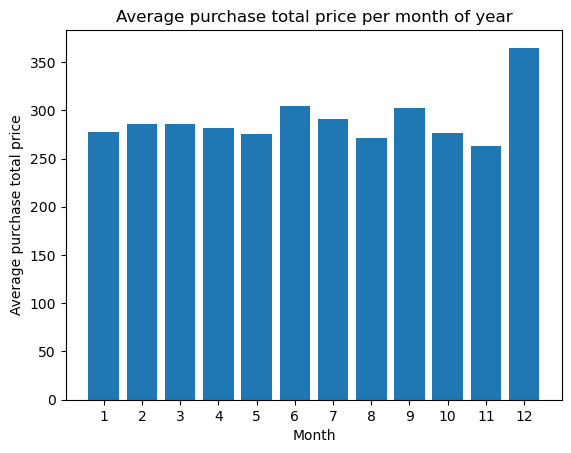

In [19]:
x = range(1, 13)
y = purchases[['month', 'total_price']].groupby(by='month').mean()['total_price']
plt.bar(x, y)
plt.xticks(x)
plt.title('Average purchase total price per month of year')
plt.xlabel("Month")
plt.ylabel("Average purchase total price")

### Step 8
Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.


In [20]:
from scipy.stats import ttest_rel

data = pd.pivot_table(purchases, index=['month', 'shop_id'], values='total_price', aggfunc='mean').reset_index()
data = data.loc[data['month'] >= 11]
data_november = data[data['month'] == 11]
data_december = data[data['month'] == 12]
sample_november = data_november['total_price']
sample_december = data_december['total_price']

statistic, p_value = ttest_rel(a=sample_december, 
          b=sample_november,
          alternative='two-sided')
print(f't-statistic = {round(statistic)}')
print(f'p-value = {p_value}')

t-statistic = 12
p-value = 2.8875117936923646e-19


Text(0, 0.5, 'Average purchase price in shop')

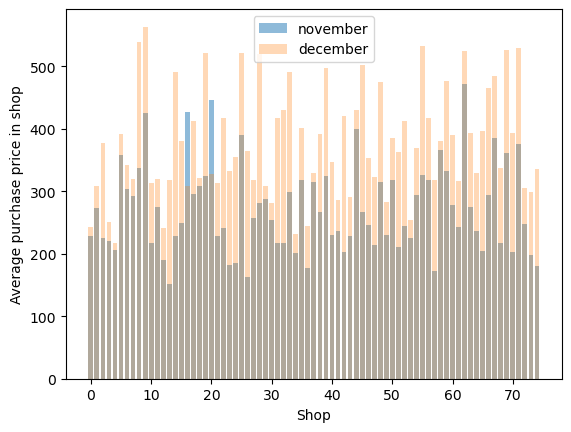

In [21]:
plt.bar(range(len(sample_november)), sample_november, alpha=0.5, label='november')
plt.bar(range(len(sample_december)), sample_december, alpha=0.3, label='december')
plt.legend()
plt.xlabel('Shop')
plt.ylabel('Average purchase price in shop')

### Step 9

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase. To study this relation, first join tables `purchases` and `customers` in such a way to obtain information on customer's age for each purchase.

In [22]:
purchases.head(3)

,customer_id,date,shop_id,total_price,month,year
0,0.0,2018-05-04,40,289.673291,5,2018
1,0.0,2019-01-26,40,1316.898901,1,2019
2,0.0,2018-11-18,42,159.414367,11,2018


In [23]:
customers.head(3)

,customer id,age
0,1149,71.0
1,750,21.0
2,428,36.0


In [24]:
purchases_c = customers.rename(columns={'customer id': 'customer_id'}).merge(purchases,
                                                                             on='customer_id')
purchases_c = purchases_c.dropna(subset=['customer_id'])
purchases_c.head(3)

,customer_id,age,date,shop_id,total_price,month,year
0,1149,71.0,2019-05-15,60,40.143994,5,2019
1,1149,71.0,2018-06-14,60,307.206163,6,2018
2,1149,71.0,2018-09-23,4,1327.170365,9,2018


### Step 10

To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer. Let us do it by groupping and aggregating. Transform table `purchases_c` to find average `total_price` for each customer and keep column `age`.


In [27]:
purchases_c_mean = purchases_c.groupby("customer_id").mean().drop(['shop_id'], axis=1)

C:\Users\y2966\AppData\Local\Temp\ipykernel_10888\3389457417.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  purchases_c_mean = purchases_c.groupby("customer_id").mean().drop(['shop_id'], axis=1)


### Step 11
Let us visualize the relation between customer's `age` (horizontal axis) and their average `total_price` (vertical axis).

In [29]:
purchases_c_mean.head(3)

,age,total_price,month,year
customer_id,,,,
0,38.0,711.291471,6.388889,2018.333333
2,60.0,380.286822,7.093750,2018.250000
3,NaN,392.825462,6.366667,2018.400000


Text(0, 0.5, 'Total price')

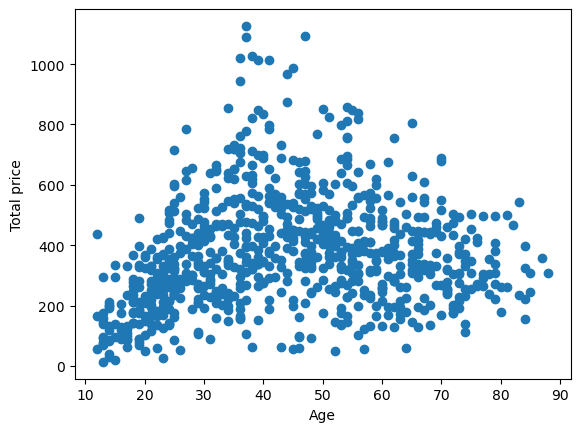

In [30]:
x = purchases_c_mean['age']
y = purchases_c_mean['total_price']
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Total price')

### Step 12
Find Pearson's correlation coefficient between age and total price.

In [31]:
purchases_c_mean.corr(method='pearson')

,age,total_price,month,year
age,1.000000,0.165395,-0.047228,0.033462
total_price,0.165395,1.000000,-0.037847,-0.076287
month,-0.047228,-0.037847,1.000000,-0.754006
year,0.033462,-0.076287,-0.754006,1.000000


### Step 13
We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. To do it, let us perform a statistical test of the significance of correlation. This can be done with `scipy.stats.pearsonr`. However, our data contains `NaN`'s in column `age` (there are registered customers with unknown age).

In [32]:
from scipy.stats import pearsonr

data = purchases_c_mean.dropna(subset=['age'])
pearsonr(x=data['age'],
         y=data['total_price'],
         alternative='two-sided')

PearsonRResult(statistic=0.16539508120771906, pvalue=1.8110789103295103e-06)

### Step 14
Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers. This can be a bit tricky: for each purchase we know its date and shop id. For each shop we also know the dates of all special offers (there can be several). So for each purchase we have to compare its date with dates of all offers that took place in the corresponding shop.

As a first step, let us try to join `purchases_c` with `shops`. Name this table `full_df_preliminary`.

In [33]:
purchases_c.head(3)

,customer_id,age,date,shop_id,total_price,month,year
0,1149,71.0,2019-05-15,60,40.143994,5,2019
1,1149,71.0,2018-06-14,60,307.206163,6,2018
2,1149,71.0,2018-09-23,4,1327.170365,9,2018


In [34]:
shops.head(3)

,shop_id,offer_begin,offer_end
0,0,2019-02-28,2019-03-13
1,0,2018-07-22,2018-08-10
2,0,2018-09-21,2018-09-27


In [35]:
full_df_preliminary = purchases_c.merge(shops, how='left', on='shop_id')
full_df_preliminary['offer_begin'] = full_df_preliminary['offer_begin'].astype(str)
full_df_preliminary['offer_end'] = full_df_preliminary['offer_end'].astype(str)

### Step 15
Let us investigate the table `full_df_preliminary`. Each row of this table corresponds to some purchase. However, for some shops we have several special offers and therefore several rows in the table `shops`. During the join each purchase is joined to all rows of `shops` that correspond to a particular shop. Therefore, purchases are duplicated, and we lost information on which rows in `full_df_preliminary` correspond to which purchase. (For example, the last two rows seem to correspond to the same purchase, but can we be sure?) This is due to the fact that table `purchases_c` don't have any explicit column with purchase identifier. Let us add it. As each row of `purchases_c` corresponds to exactly one purchase, table index can work as such an identifier.

In [37]:
full_df = full_df_preliminary.merge(purchases_c.reset_index())
full_df

,customer_id,age,date,shop_id,total_price,month,year,offer_begin,offer_end,index
0,1149,71.0,2019-05-15,60,40.143994,5,2019,2018-07-07,2018-08-02,0
1,1149,71.0,2018-06-14,60,307.206163,6,2018,2018-07-07,2018-08-02,1
2,1149,71.0,2018-09-23,4,1327.170365,9,2018,2018-08-28,2018-09-28,2
3,1149,71.0,2018-09-23,4,1327.170365,9,2018,2018-08-28,2018-09-04,2
4,1149,71.0,2018-07-04,22,151.766925,7,2018,2019-01-14,2019-02-12,3
...,...,...,...,...,...,...,...,...,...,...
69403,562,22.0,2018-12-16,74,1075.034721,12,2018,2018-09-14,2018-10-12,28796
69404,562,22.0,2018-12-16,74,1075.034721,12,2018,2018-12-08,2019-01-10,28796
69405,562,22.0,2018-12-16,74,1075.034721,12,2018,2018-08-22,2018-08-28,28796
69406,562,22.0,2018-11-04,29,431.440952,11,2018,2018-05-26,2018-06-21,28797


### Step 16
Now we need to check for each purchase, did it happen during any of the special offers or not. In the dataset `full_df`, each row relates some purchase with some special offer that happened in the same shop as a purchase. Let us check, is it true that this purchase happened during the corresponding offer?


In [39]:
full_df_offer = full_df.copy()

full_df_offer['offer_begin'] = pd.to_datetime(full_df_offer['offer_begin'])
full_df_offer['offer_end'] = pd.to_datetime(full_df_offer['offer_end'])

full_df_offer['offer'] = full_df_offer.apply(lambda x: x.offer_begin <= x.date and x.date <= x.offer_end, axis=1)
full_df_offer.head()

,customer_id,age,date,shop_id,total_price,month,year,offer_begin,offer_end,index,offer
0,1149,71.0,2019-05-15,60,40.143994,5,2019,2018-07-07,2018-08-02,0,False
1,1149,71.0,2018-06-14,60,307.206163,6,2018,2018-07-07,2018-08-02,1,False
2,1149,71.0,2018-09-23,4,1327.170365,9,2018,2018-08-28,2018-09-28,2,True
3,1149,71.0,2018-09-23,4,1327.170365,9,2018,2018-08-28,2018-09-04,2,False
4,1149,71.0,2018-07-04,22,151.766925,7,2018,2019-01-14,2019-02-12,3,False


In [40]:
from itertools import islice

for _, row in islice(full_df_offer.iterrows(), 0, 1000):
    assert (
        (pd.to_datetime(row["date"]) >= pd.to_datetime(row["offer_begin"]))
        & (pd.to_datetime(row["date"]) <= pd.to_datetime(row["offer_end"]))
    ) == row["offer"]


Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer. This can be done by grouping and aggregating. Basically, we need to group our table by column `index` that contains a purchase identifier and apply a special aggregation function `any` to column `offer`. This function checks if there is any `True` element in a group and returns `True` in this case, otherwise (everything is `False`) it returns false. Also, we have to keep all other columns that are related to purchases as is. They are duplicated in the group, so we can just get the first value. This is done by the aggregation function `first`. To apply these functions to different columns, we have to pass a dictionary to method `.agg`. Let's see what's happening.


In [41]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)
purchases_offer

,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,1149,2019-05-15,60,40.143994,5,71.0,False
1,1149,2018-06-14,60,307.206163,6,71.0,False
2,1149,2018-09-23,4,1327.170365,9,71.0,True
3,1149,2018-07-04,22,151.766925,7,71.0,False
4,1149,2018-09-20,60,140.601729,9,71.0,False
...,...,...,...,...,...,...,...
28794,562,2019-05-11,74,592.305574,5,22.0,False
28795,562,2018-12-08,74,232.074279,12,22.0,True
28796,562,2018-12-16,74,1075.034721,12,22.0,True


### Step 17
Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

First of all, we know that during December people spend more money in shops due to holidays and at the time shops usually announce more special offers during December. As we are interested in the effect of special offers alone, let us remove all purchases that happened during December.

Then create a table which rows are customers that contains two columns: in one column we have average of all prices of purchases that were made during special offers, and in the second the same for purchases that were not made during special offers. Drop all rows that contain `NaN`'s. Then apply an appropriate statistical test to check if there is any statistically significant difference between these columns.




In [42]:
purchases_offer['month'] = purchases_offer['date'].dt.month
del_index = purchases_offer[purchases_offer['month'] == 12].index
purchases_offer_without_dec = purchases_offer.drop(del_index)[['customer_id', 'total_price', 'offer']]
purchases_offer_without_dec.head(5)

,customer_id,total_price,offer
index,,,
0,1149,40.143994,False
1,1149,307.206163,False
2,1149,1327.170365,True
3,1149,151.766925,False
4,1149,140.601729,False


In [43]:
purchases_with_offers = purchases_offer_without_dec\
                                        .loc[purchases_offer_without_dec.offer == True]\
                                        .groupby('customer_id')\
                                        .mean()\
                                        .rename(columns={'total_price': 'price_with_offers'})
purchases_without_offers = purchases_offer_without_dec\
                                            .loc[purchases_offer_without_dec.offer == False]\
                                            .groupby('customer_id')\
                                            .mean()\
                                            .rename(columns={'total_price': 'price_without_offers'})
data = purchases_with_offers.merge(purchases_without_offers, on='customer_id')\
                            [['price_with_offers', 'price_without_offers']]
data.head(5)

,price_with_offers,price_without_offers
customer_id,,
0,901.935686,685.331168
2,318.049544,389.216152
3,551.356873,311.611398
4,325.092632,347.161530
5,279.079141,487.628759


In [44]:
from scipy.stats import ttest_rel

In [45]:
a = np.array(data['price_with_offers'])
b = np.array(data['price_without_offers'])
ttest_rel(a, b, alternative='two-sided', nan_policy='omit')

TtestResult(statistic=16.682645056499567, pvalue=3.221672499502215e-53, df=734)

## Results 

- W​e can reject null hypothesis.
- W​e may safely assume that people spend more money per each visit during special offers.

